## Class 2 - Defining evaluation metrics and fitting basic regression models
In our second lecture, we discussed a number of algorithms and evaluation metrics for regression problems. Today, we will go back to the datasets we looked at last week, and implement some of these algorithms and evaluation metrics on the predictive modeling problems we have defined. 

We will do all of this using `scikit-learn`. A couple of useful pointers to useful documentation, before we start:
- In general, the scikit-learn documentation is your friend: https://scikit-learn.org/stable/
- Here is a list of linear models implemented as Extractors/Predictors in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- Here are different forms of neighbor-based models (we talked about `KNNRegressor` yesterday)
- Here are evaluation metrics implemented in sklearn: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics 
- Here are utilities for preprocessing steps: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing 

**Note**: Under `nbs/class_02` you will find a notebook called `example.ipynb`, where I provide an example of how to run today's exercise on simulated data.

### Today's exercise
Gather in the same or similar groups as last week. Under `class/class_02.md` you will find two predictive modeling questions, one for each datasets. There are different variants of the same questions, which differ in which outcome you want to predict.

What I would like you to do today is the following:
1. Create a folder called `group-x` within `nbs/class_02`, `cd` into it and work within that today
2. Choose an outcome variable for a regression problem. On the basis of this, define **which of the evaluation metrics** could be suitable. Evaluation metrics can be computed using scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 
3. (a) If you are in the bike sharing group, split your dataset into a training/validation/test set using later time points as validation/test set. Validation and test set should be 15% of your data each. (b) If you are in the personality group, using sklearn's `train_test_split` function, create a 70/15/15 random split of your data.
    - Remember to set a seed (`random_state`) when you do so. Let's all use the same (the classic `random_state=42`)
    - Save these datasets as separate csv files in a subfolder called `data`
4. Look at your outcome and predictors: do you want to transform them in any way?
5. Estimate the performance of a dummy baseline (i.e., the mean model) on all splits
6. Now look at your predictors: do they need any preprocessing? Any transformations? Removal of "bad" data points?
7. Fit the other models using KKN (sklearn's `KNeighborsRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and linear models (`LinearRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Save the fitted model object (with a meaningful name) using `pickle` (https://scikit-learn.org/stable/model_persistence.html) in a subfolder called `model`.
8. Once you are done, evaluate all models on both the training and the validation set and visualize the scores


### Once you have done this
Please submit a pull request to my repository where, within `nbs/class_02/group-x` you have: 
- the notebook on which you have worked
- a subfolder called `data` containing your splits
- a subfolder called `models` containing your models

In next week's class, I will ask each group to briefly present their results.

# Starting exercise

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


### Loading bike data

In [2]:
df = pd.read_csv("../../../../Project Files/data/class_01/bikes.csv")

### Creating outcome variable
Proportion of casual users

In [3]:
df["propoertion_cas_reg"] = df["casual"]/df["cnt"]

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,propoertion_cas_reg
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.172143
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.136557
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.063492
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.146893
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.253731
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


### Choosing evaluation metric

R2 since it gives an idea how the overall performance of the model is. It is not scale dependent and it looks at global performance rather than local predictions ish

### Transforming 
Creating flag variables for categorical variables 

In [13]:
columns = ["season", "weekday", "mnth", "weathersit"]

df = pd.get_dummies(df, prefix=columns, columns=columns, dtype=int)

In [14]:
df

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0000,...,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0000,...,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0000,...,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0000,...,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,19,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,1,0,1,0,0
17375,17376,2012-12-31,1,20,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,1,0,1,0,0
17376,17377,2012-12-31,1,21,0,1,0.26,0.2576,0.60,0.1642,...,0,0,0,0,0,1,1,0,0,0
17377,17378,2012-12-31,1,22,0,1,0.26,0.2727,0.56,0.1343,...,0,0,0,0,0,1,1,0,0,0


### Splitting data
15\% test, 15\% validation and 70\% train data
The test will be the latest 15%, and the training will be the oldest 70%

In [15]:
# number of rows amounting to 15% of the data
split_len = int(0.15 * len(df))

# test data - the last 15% of the rows
df_test = df.iloc[-split_len:,:]

# remaining data for train and validation
df_train_val = df.iloc[:-split_len,:]
# validation data - the last 15% of the rows
df_val = df_train_val.iloc[-split_len:,:]

# training data - the remaining data of the train and val data
df_train = df_train_val.iloc[:-split_len,:]

In [16]:
print(df_val)

       instant      dteday  yr  hr  holiday  workingday  temp   atemp   hum  \
12167    12168  2012-05-27   1   4        0           0  0.62  0.5758  0.83   
12168    12169  2012-05-27   1   5        0           0  0.62  0.5758  0.83   
12169    12170  2012-05-27   1   6        0           0  0.62  0.5758  0.83   
12170    12171  2012-05-27   1   7        0           0  0.62  0.5606  0.88   
12171    12172  2012-05-27   1   8        0           0  0.64  0.5758  0.83   
...        ...         ...  ..  ..      ...         ...   ...     ...   ...   
14768    14769  2012-09-12   1  13        0           1  0.70  0.6364  0.34   
14769    14770  2012-09-12   1  14        0           1  0.70  0.6364  0.37   
14770    14771  2012-09-12   1  15        0           1  0.72  0.6515  0.37   
14771    14772  2012-09-12   1  16        0           1  0.72  0.6515  0.37   
14772    14773  2012-09-12   1  17        0           1  0.70  0.6364  0.41   

       windspeed  ...  mnth_7  mnth_8  mnth_9  mnth

In [7]:
print(df_test)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
14773    14774  2012-09-12       3   1     9  18        0        3   
14774    14775  2012-09-12       3   1     9  19        0        3   
14775    14776  2012-09-12       3   1     9  20        0        3   
14776    14777  2012-09-12       3   1     9  21        0        3   
14777    14778  2012-09-12       3   1     9  22        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
14773           1           1  0.66  0.6212  0.44     0.2537      91   
14774          

In [17]:
# saving data 
df_test.to_csv("/work/SilleHasselbalchMarkussen#4503/DataSci-AU-24/nbs/group_RMDS/data/bikes_test.csv")
df_val.to_csv("/work/SilleHasselbalchMarkussen#4503/DataSci-AU-24/nbs/group_RMDS/data/bikes_validation.csv")
df_train.to_csv("/work/SilleHasselbalchMarkussen#4503/DataSci-AU-24/nbs/group_RMDS/data/bikes_train.csv")

### Reload data and split into X and y

In [6]:
bike_train = pd.read_csv("data/bikes_train.csv")
bike_val = pd.read_csv("data/bikes_validation.csv")
bike_test = pd.read_csv("data/bikes_test.csv")

In [8]:
len(df_test)

2606

In [18]:
# train
y_train = df_train["propoertion_cas_reg"].values
X_train = df_train.drop(["propoertion_cas_reg", "registered", "casual", "cnt","dteday"], axis=1) # dropping on the first axis

In [19]:
# validation
y_val = df_val["propoertion_cas_reg"].values
X_val = df_val.drop(["propoertion_cas_reg", "registered", "casual", "cnt","dteday"], axis=1)

In [20]:
# test
y_test = df_test["propoertion_cas_reg"].values
X_test = df_test.drop(["propoertion_cas_reg", "registered", "casual", "cnt","dteday"], axis=1)

### Modeling


0. Dummy model

In [47]:
performances = []

mean_value = y_train.mean() # predicting 
model_name = 'dummy'

for y,nsplit in zip([y_train, y_val, y_test], # zip two list together
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    performances.append({'model': model_name, # append to list with all the info
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [48]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 0.1426, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 0.1224, 'r2': -0.0753},
 {'model': 'dummy', 'split': 'test', 'rmse': 0.12, 'r2': -0.0734}]

1. Instant as the only predictor

In [49]:
instant_pred = X_train["instant"].to_numpy().reshape(-1,1)

In [50]:
reg = LinearRegression().fit(instant_pred, y_train)


In [ ]:
pkl.dump(reg, file=open(f'/work/SilleHasselbalchMarkussen#4503/DataSci-AU-24/nbs/group_RMDS/models/linear-instant.pkl', 'wb')) # save the model

In [51]:

for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    preds = reg.predict(x["instant"].to_numpy().reshape(-1,1))
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'linear-demographics',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [52]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 0.1426, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 0.1224, 'r2': -0.0753},
 {'model': 'dummy', 'split': 'test', 'rmse': 0.12, 'r2': -0.0734},
 {'model': 'linear-demographics',
  'split': 'train',
  'rmse': 0.1425,
  'r2': 0.0023},
 {'model': 'linear-demographics',
  'split': 'val',
  'rmse': 0.127,
  'r2': -0.1575},
 {'model': 'linear-demographics',
  'split': 'test',
  'rmse': 0.1161,
  'r2': -0.0053}]

2. Model including weather info (temperature, windspeed) and temporal parameters as predictors

In [41]:
X_train.describe()

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,...,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000,12167.000000
mean,6084.000000,0.289472,11.555848,0.027369,0.684474,0.468148,0.450987,0.627209,0.196175,0.327114,...,0.061149,0.060081,0.058930,0.061067,0.059094,0.060902,0.652503,0.258486,0.088765,0.000247
std,3512.454697,0.453536,6.912036,0.163163,0.464744,0.188542,0.169513,0.200262,0.125044,0.469179,...,0.239613,0.237646,0.235503,0.239463,0.235811,0.239161,0.476195,0.437820,0.284415,0.015701
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3042.500000,0.000000,6.000000,0.000000,0.000000,0.320000,0.310600,0.470000,0.104500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6084.000000,0.000000,12.000000,0.000000,1.000000,0.460000,0.454500,0.620000,0.194000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,9125.500000,1.000000,18.000000,0.000000,1.000000,0.620000,0.590900,0.790000,0.283600,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,12167.000000,1.000000,23.000000,1.000000,1.000000,0.960000,1.000000,1.000000,0.850700,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
weather_pred = X_train[["hum", "temp", "season_1", "season_2", "season_3", "season_4"]].to_numpy()


In [55]:
reg = LinearRegression().fit(weather_pred, y_train)

In [56]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    preds = reg.predict(x[["hum", "temp", "season_1", "season_2", "season_3", "season_4"]].to_numpy())
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    performances.append({'model': 'linear-weather',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [57]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 0.1426, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 0.1224, 'r2': -0.0753},
 {'model': 'dummy', 'split': 'test', 'rmse': 0.12, 'r2': -0.0734},
 {'model': 'linear-demographics',
  'split': 'train',
  'rmse': 0.1425,
  'r2': 0.0023},
 {'model': 'linear-demographics',
  'split': 'val',
  'rmse': 0.127,
  'r2': -0.1575},
 {'model': 'linear-demographics',
  'split': 'test',
  'rmse': 0.1161,
  'r2': -0.0053},
 {'model': 'linear-weather', 'split': 'train', 'rmse': 0.1287, 'r2': 0.1855},
 {'model': 'linear-weather', 'split': 'val', 'rmse': 0.1163, 'r2': 0.0295},
 {'model': 'linear-weather', 'split': 'test', 'rmse': 0.1087, 'r2': 0.1189}]

NameError: name 'plt' is not defined

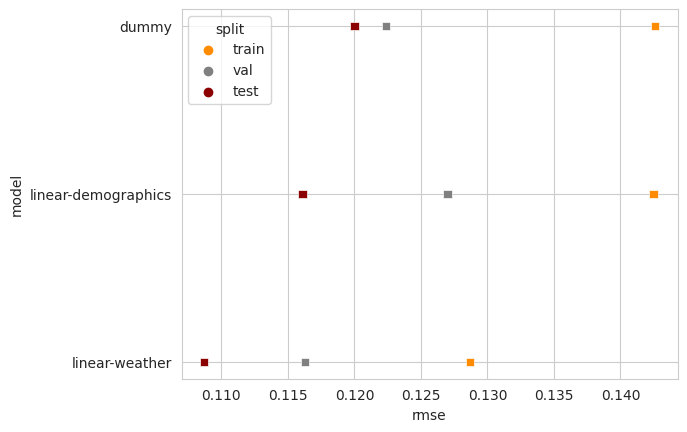

In [60]:
# plotting performance
perf_df = pd.DataFrame(performances)

sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

# WEEK 3
